In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


# var globals
var_predicts = ["Polarity", "Attraction"]

In [50]:
reviews_places = pd.read_excel("../../data/raw/Rest_Mex_2022_Sentiment_Analysis_Track_Train.xlsx")
reviews_places.head()

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,"Piensen dos veces antes de ir a este hotel, te...",1.0,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1.0,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1.0,Hotel
3,Minusválido? ¡No te alojes aquí!,Al reservar un hotel con multipropiedad Mayan ...,1.0,Hotel
4,Es una porqueria no pierdan su tiempo,"No pierdan su tiempo ni dinero, venimos porque...",1.0,Hotel


In [25]:
reviews_places.Polarity.unique()

array([1., 2., 3., 4., 5.])

In [3]:
reviews_places[reviews_places.Opinion.isna()]

,Title,Opinion,Polarity,Attraction
8054,punto cental,NaN,4.0,Attractive
29566,Lugar lleno de historia,NaN,5.0,Attractive


In [4]:
reviews_places[reviews_places.Title.isna()]

,Title,Opinion,Polarity,Attraction
28653,NaN,"De los lugares más bonitos de Guanajuato, a un...",5.0,Attractive


In [5]:
reviews_places = reviews_places[~reviews_places.Opinion.isna()]

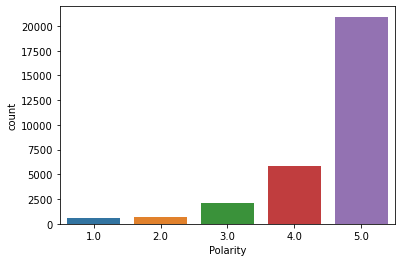

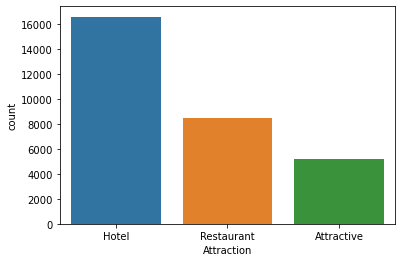

In [6]:
for i in var_predicts:
    sns.countplot(data=reviews_places, x=i)
    plt.show()

En las calificaciones se ve claro que hay desbalanceo entre las categorías.

### Words cloud

In [7]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt

1.0
2.0
3.0
4.0
5.0
Hotel
Restaurant
Attractive


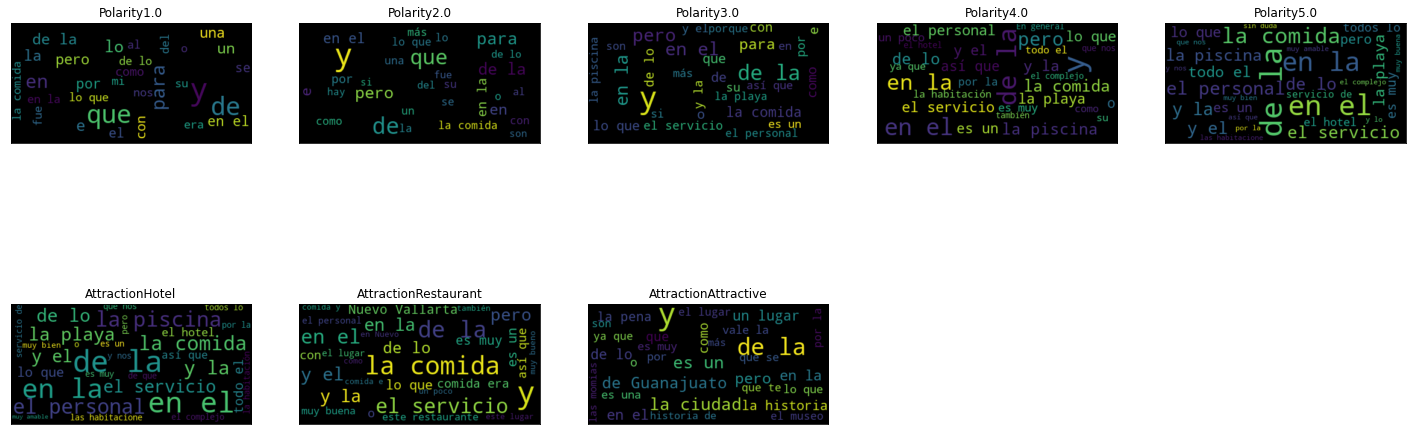

In [8]:
fig = plt.figure(figsize=(25,25))
count = 1 
for ind_j, j in enumerate(["Polarity", "Attraction"]):
    for k in reviews_places[j].unique():
        print(k)
        aux_txt = []
        for i in reviews_places.loc[reviews_places[j]==k,"Opinion"]:
            aux_txt.append(i)
        text = " ".join(aux_txt)
        wordcloud = WordCloud(max_font_size=50, max_words=30).generate(text)
        ax = fig.add_subplot(5, 5, count, xticks=[], yticks=[])
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(j+str(k))
        count += 1 
plt.show()

In [29]:
import numpy as np

In [59]:
def error_metric_analysis_sentiment(y_predict, y_real):
    errors = []
    for i, val in enumerate([1., 2., 3., 4., 5.]):
        ind_i = y_real["Polarity"]==val
        errors.append(mean_absolute_error(y_predict.loc[ind_i,"Polarity"],y_real.loc[ind_i, "Polarity"]))
        
    errors.append(mean_absolute_error(y_predict["Polarity"], y_real["Polarity"]))
    for k, val, in enumerate([0, 1, 2]):
        ind_k = y_real["Attraction"]==val
        errors.append(mean_absolute_error(y_predict.loc[ind_k,"Attraction"],y_real.loc[ind_k, "Attraction"]))
    errors.append(f1_score(y_predict["Attraction"], y_real["Attraction"], average="macro"))
    errors.append((1/(1+errors[5])+errors[9])/2)
    return errors

In [51]:
dic_attraction = {'Hotel':0, 'Restaurant':1, 'Attractive':2}
reviews_places["Attraction"] = reviews_places["Attraction"].apply(lambda x: dic_attraction[x])

In [60]:
error_metric_analysis_sentiment(reviews_places[["Polarity","Attraction"]],reviews_places[["Polarity","Attraction"]] )

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

In [28]:
for i, a in enumerate(["asd","asd"]):
    print(i)

0
1


In [66]:
from sklearn.model_selection import train_test_split
col_text = "Opinion"
var_predictions = ["Polarity", "Attraction"]
X_train, X_test, y_train, y_test = train_test_split(reviews_places[col_text], reviews_places[var_predictions], 
      test_size=0.20, random_state=19970808)

In [69]:
pd.concat([X_train, y_train], axis=1)

,Opinion,Polarity,Attraction
14034,Mi marido y yo hemos estado viajando a Grand V...,5.0,0
19865,Me agrado todo pero el grupo de animadores Pac...,5.0,0
19584,Es un restaurante muy buen montado comida auté...,5.0,1
6228,Hora de llegada\nLa peor parte de toda la expe...,4.0,0
11086,Esta muy su per padre nuestra vacaciones joy s...,5.0,0
...,...,...,...
9850,La pasamos felices mi familia y yo. Mi hija pr...,5.0,0
28713,Aquí vuelves a la historia de la época de la i...,5.0,2
11008,"Tengo que decir, el registro fue un poco rocos...",5.0,0
5992,Un maravilloso complejo más pequeño Hard Rock ...,4.0,0
